In [108]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [111]:
flats_pkl = pd.read_csv('data/clean/flats-pkl-clean-v1.csv')
df = flats_pkl.copy()

In [112]:
df.head()

,property_id,property_name,property_type,link,Society,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,W76639483,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,DLF The Valley,"DLF The Valley, Sector 3 Panchkula, Panchkula,...","Sector 3 Panchkula, Panchkula, Haryana","8,000 per sq.ft.",Super Built up area 1750(162.58 sq.m.) sq.ft.,sq.ft.,3,3,3,Store Room,East,2,2,Main Road,ModOld,Ceramic,Yes,Unfurnished,0,1,80.0,24*7 Water,Full,No,No,Located in the foothills of the shivalik range...,NaN,"['Security / Fire Alarm', 'Maintenance Staff',...",1.40
1,J75852183,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,"pkl, Sector 7 Panchkula, Panchkula, Haryana","Sector 7 Panchkula, Panchkula, Haryana","15,806 per sq.ft.",Super Built up area 1800(167.23 sq.m.)Carpet a...,sq.ft.,3,3,2,NaN,South-West,4,4,Main Road,RelNew,Marble,No,Semifurnished,2,1,50.0,Municipal corporation,NaN,No,No,On prime b road right next to chandigarh entry...,"['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '6 Li...","['Water Storage', 'Rain Water Harvesting']",2.45
2,M75685609,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,DLF The Valley,"DLF The Valley, Sector 3 Panchkula, Panchkula,...","Sector 3 Panchkula, Panchkula, Haryana","7,714 per sq.ft.",Super Built up area 1750(162.58 sq.m.) sq.ft.,sq.ft.,3,3,2,Servant Room,NaN,1,2,NaN,RelNew,NaN,No,Semifurnished,0,0,NaN,NaN,NaN,No,No,This 3 bhk apartment is available for sale in ...,"['2 Wardrobe', '1 Modular Kitchen', 'No AC', '...","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness ...",1.35
3,O75685647,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,DLF The Valley,"DLF The Valley, Sector 3 Panchkula, Panchkula,...","Sector 3 Panchkula, Panchkula, Haryana","9,714 per sq.ft.",Super Built up area 1575(146.32 sq.m.) sq.ft.,sq.ft.,3,3,2,Servant Room,NaN,0,2,NaN,RelNew,NaN,No,Semifurnished,0,0,NaN,NaN,NaN,No,No,This 3 bhk apartment is available for sale in ...,"['2 Wardrobe', '1 Modular Kitchen', 'No AC', '...","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness ...",1.70
4,W75986869,4BHK 1Bath,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,DLF The Valley,"DLF The Valley, Sector 3 Panchkula, Panchkula,...","Sector 3 Panchkula, Panchkula, Haryana","13,461 per sq.ft.",Carpet area: 2600 (241.55 sq.m.) sq.ft.,sq.ft.,4,1,3,NaN,NaN,2,4,"Club,Others,Park/Garden,Pool",New,Marble,Yes,NaN,2,0,50.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,This beautiful 4 bhk flat in sector 3 panchkul...,[],"['Lift(s)', 'High Ceiling Height', 'False Ceil...",3.50


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         714 non-null    object 
 1   property_name       714 non-null    object 
 2   property_type       714 non-null    object 
 3   link                714 non-null    object 
 4   Society             269 non-null    object 
 5   address1            714 non-null    object 
 6   address2            714 non-null    object 
 7   PricePerUnit        714 non-null    object 
 8   area                714 non-null    object 
 9   area_unit           714 non-null    object 
 10  bedRoom             714 non-null    int64  
 11  bathroom            714 non-null    int64  
 12  balcony             714 non-null    int64  
 13  additionalRoom      530 non-null    object 
 14  facing              516 non-null    object 
 15  FloorNo             714 non-null    int64  
 16  TotalFlo

In [114]:
df['address1']

0      DLF The Valley, Sector 3 Panchkula, Panchkula,...
1            pkl, Sector 7 Panchkula, Panchkula, Haryana
2      DLF The Valley, Sector 3 Panchkula, Panchkula,...
3      DLF The Valley, Sector 3 Panchkula, Panchkula,...
4      DLF The Valley, Sector 3 Panchkula, Panchkula,...
5      Bollywood heights , Peer Muchalla, Panchkula, ...
6      Imperial Tower, Sector 20 Panchkula, Panchkula...
7       Tricity Homes, Peer Muchalla, Panchkula, Haryana
8               Motia, Peer Muchalla, Panchkula, Haryana
9      Imperial Apartment, Peer Muchalla, Panchkula, ...
10                      Mdc Sector 4, Panchkula, Haryana
11                      MDC Sector 6, Panchkula, Haryana
12     IMPERIAL RESIDENCY, Peer Muchalla, Panchkula, ...
13     DLF The Valley, Sector 3 Panchkula, Panchkula,...
14     DLF The Valley, Sector 3 Panchkula, Panchkula,...
15     DLF The Valley, Sector 3 Panchkula, Panchkula,...
16     DLF The Valley, Sector 3 Panchkula, Panchkula,...
17     Bollywood Heights 2, Pee

In [115]:
def address_func(x):
    if pd.notna(x):
        temp =  x.split(',')
        return temp[-3].strip(),temp[-2].strip()
    else:
        return x

In [116]:
df['address1'].apply(address_func)

0                  (Sector 3 Panchkula, Panchkula)
1                  (Sector 7 Panchkula, Panchkula)
2                  (Sector 3 Panchkula, Panchkula)
3                  (Sector 3 Panchkula, Panchkula)
4                  (Sector 3 Panchkula, Panchkula)
5                       (Peer Muchalla, Panchkula)
6                 (Sector 20 Panchkula, Panchkula)
7                       (Peer Muchalla, Panchkula)
8                       (Peer Muchalla, Panchkula)
9                       (Peer Muchalla, Panchkula)
10                       (Mdc Sector 4, Panchkula)
11                       (MDC Sector 6, Panchkula)
12                      (Peer Muchalla, Panchkula)
13                 (Sector 3 Panchkula, Panchkula)
14                 (Sector 3 Panchkula, Panchkula)
15                 (Sector 3 Panchkula, Panchkula)
16                 (Sector 3 Panchkula, Panchkula)
17                      (Peer Muchalla, Panchkula)
18                 (Sector 3 Panchkula, Panchkula)
19                 (Sector 3 Pa

In [117]:
temp_df = df['address1'].apply(address_func).apply(pd.Series)
temp_df.columns = ['Sector','City']
temp_df

,Sector,City
0,Sector 3 Panchkula,Panchkula
1,Sector 7 Panchkula,Panchkula
2,Sector 3 Panchkula,Panchkula
3,Sector 3 Panchkula,Panchkula
4,Sector 3 Panchkula,Panchkula
5,Peer Muchalla,Panchkula
6,Sector 20 Panchkula,Panchkula
7,Peer Muchalla,Panchkula
8,Peer Muchalla,Panchkula
9,Peer Muchalla,Panchkula


In [118]:
temp_df['Sector'].value_counts()

Sector
Sector 3 Panchkula                209
Sector 20 Panchkula               101
Peer Muchalla                      94
Sector 15 Panchkula                28
Sector 4 Panchkula                 19
Sector 21 Panchkula                19
Sector 17 Panchkula                19
Zirakpur                           18
Sector 11 Panchkula                18
Sector 2 Panchkula                 17
Sector 7 Panchkula                 15
Mdc Sector 4                       14
Sector 8 panchkula                 12
MDC Sector 6                       11
MDC Sector-5                       10
Sector 16 Panchkula                 9
Sector 10 Panchkula                 9
Sector 9 Panchkula                  8
Sector 12 A Panchkula               8
Sector 12 Panchkula                 8
Sector 14 Panchkula                 7
Sector 24 Panchkula                 6
Kishanpura                          5
Sector 28 Panchkula                 5
Sector 27 Panchkula                 5
Sector 6 Panchkula                  4
Mansa

In [119]:
df.insert(5,'City',value = temp_df['City'].values)
df.insert(5,'Sector',value = temp_df['Sector'].values)

In [120]:
def sector_filt(sector):
    return df[df['Sector'] == sector][['Society','Sector','City']]

In [121]:
## 'Mdc Sector 4', 'MDC Sector 6','MDC Sector-5',''

In [122]:
sector_filt('Mdc Sector 4')

,Society,Sector,City
10,NaN,Mdc Sector 4,Panchkula
46,NaN,Mdc Sector 4,Panchkula
247,NaN,Mdc Sector 4,Panchkula
259,The Manav Hut,Mdc Sector 4,Panchkula
272,NaN,Mdc Sector 4,Panchkula
278,NaN,Mdc Sector 4,Panchkula
304,NaN,Mdc Sector 4,Panchkula
305,NaN,Mdc Sector 4,Panchkula
376,NaN,Mdc Sector 4,Panchkula
493,NaN,Mdc Sector 4,Panchkula


In [123]:
mdc_rows = []
for i in ['Mdc Sector 4', 'MDC Sector 6','MDC Sector-5']:
    mdc_rows += list(sector_filt(i).index)

In [124]:
for i in mdc_rows:
    df['Sector'].loc[i] = 'Mansa Devi Complex'

In [125]:
df.loc[mdc_rows]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
10,X75949943,4BHK 5Baths,Builder Floor,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Mansa Devi Complex,Panchkula,"Mdc Sector 4, Panchkula, Haryana","Mdc Sector 4, Panchkula, Haryana","9,777 per sq.ft.",Carpet area: 4500 (418.06 sq.m.) sq.ft.,sq.ft.,4,5,2,Pooja Room,West,1,4,NaN,New,Vitrified,Yes,Unfurnished,1,1,NaN,Municipal corporation,Partial,No,No,4bhk luxurious ready to move residential floor...,NaN,NaN,4.400
46,H75520189,4BHK 4Baths,Builder Floor,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Mansa Devi Complex,Panchkula,"Mdc Sector 4, Panchkula, Haryana","Mdc Sector 4, Panchkula, Haryana","12,857 per sq.ft.",Carpet area: 3500 (325.16 sq.m.) sq.ft.,sq.ft.,4,4,3,"Servant Room,Pooja Room",North,2,4,"Main Road,Others",New,Marble,No,Semifurnished,0,0,40.0,"24*7 Water,Borewell/Tank,Municipal corporation",NaN,Yes,Yes,"4 bhk builder floor in mdc sector 4, panchkula...","['4 Wardrobe', '5 Fan', '3 Geyser', 'No AC', '...","['Feng Shui / Vaastu Compliant', 'Water purifi...",4.500
247,K75741401,4BHK 5Baths,Builder Floor,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Mansa Devi Complex,Panchkula,"BRAND NEW ONE KANAL FLOORS , Mdc Sector 4, Pan...","Sector 4 Mdc Panchkula, Mdc Sector 4, Panchkul...","15,172 per sq.ft.",Super Built up area 11500(1068.38 sq.m.)Carpet...,sq.ft.,4,5,4,"Servant Room,Store Room,Pooja Room",North-East,0,4,Park/Garden,New,Marble,No,Semifurnished,4,4,40.0,"Borewell/Tank,Municipal corporation",Partial,Yes,Yes,Its a builder floor houseGf=4:40\nFf=3:60\nSf=...,"['5 Wardrobe', '5 Fan', '1 Exhaust Fan', '70 L...","['Feng Shui / Vaastu Compliant', 'Private Gard...",4.400
259,W69211060,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,The Manav Hut,Mansa Devi Complex,Panchkula,"The Manav Hut, Mdc Sector 4, Panchkula, Haryana","806, Mdc Sector 4, Panchkula, Haryana","7,916 per sq.ft.",Super Built up area 1200(111.48 sq.m.) sq.ft.,sq.ft.,2,2,4,Store Room,North-East,8,8,Park/Garden,ModOld,Marble,Yes,Furnished,1,0,NaN,NaN,NaN,No,No,Rare availability flat with hill side view - C...,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 E...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...",0.990
272,V75723377,4BHK 4Baths,Builder Floor,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Mansa Devi Complex,Panchkula,"Mdc Sector 4, Panchkula, Haryana","Mdc Sector 4, Panchkula, Haryana","96,000 per sq.yards",Carpet area: 500 (418.06 sq.m.) sq.yards,sq.yards,4,4,2,"Pooja Room,Others,Study Room",East,3,4,"Main Road,Others",RelNew,Marble,Yes,Furnished,2,2,45.0,Municipal corporation,Full,Yes,Yes,B road \nFully furnished floor with all elegan...,"['1 Water Purifier', '1 Fridge', '5 Fan', '1 E...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",4.800
278,M76254789,4BHK 5Baths,Builder Floor,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Mansa Devi Complex,Panchkula,"Mdc Sector 4, Panchkula, Haryana","Mdc Sector 4, Panchkula, Haryana","8,000 per sq.ft.",Super Built up area 4500(418.06 sq.m.)Built Up...,sq.ft.,4,5,2,"Study Room,Others",North-West,1,4,Others,New,Vitrified,No,Semifurnished,1,1,40.0,Municipal corporation,Partial,Yes,Yes,500 gaj builder floor with lift ready to move ...,"['4 Wardrobe', '1 Water Purifier', '8 Fan', '1...","['Private Garden / Terrace', 'Lift(s)', 'High ...",3.600
304,F76648803,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Mansa Devi Complex,Panchkula,"IRWO Rail Vihar, Mdc Sector 4, Panchkula, Haryana","Flat, Mdc Sector 4, Panchkula, Haryana","8,235 per sq.ft.",Carpet area: 850 (78.97 sq.m.) sq.ft.,sq.ft.,2,2,2,NaN,NaN,0,4,NaN,Old,NaN,Yes,Semifurnishe

In [126]:
df['Sector'].value_counts()

Sector
Sector 3 Panchkula                209
Sector 20 Panchkula               101
Peer Muchalla                      94
Mansa Devi Complex                 39
Sector 15 Panchkula                28
Sector 4 Panchkula                 19
Sector 21 Panchkula                19
Sector 17 Panchkula                19
Sector 11 Panchkula                18
Zirakpur                           18
Sector 2 Panchkula                 17
Sector 7 Panchkula                 15
Sector 8 panchkula                 12
Sector 10 Panchkula                 9
Sector 16 Panchkula                 9
Sector 12 Panchkula                 8
Sector 9 Panchkula                  8
Sector 12 A Panchkula               8
Sector 14 Panchkula                 7
Sector 24 Panchkula                 6
Kishanpura                          5
Sector 28 Panchkula                 5
Sector 27 Panchkula                 5
Sector 6 Panchkula                  4
dhakoli                             3
Pink City                           3
Amrav

In [127]:
df.loc[sector_filt('Pink City').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
279,A76413441,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Pink City,Panchkula,"Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","5,040 per sq.ft.",Carpet area: 990 (91.97 sq.m.) sq.ft.,sq.ft.,3,3,1,Others,East,1,3,NaN,New,Vitrified,Yes,Semifurnished,1,1,35.0,Municipal corporation,NaN,No,No,3 bhk brand new luxurious flat first floor wit...,"['3 Wardrobe', '12 Light', '1 Modular Kitchen'...","['Water Storage', 'Visitor Parking']",0.499
288,F75811231,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Pink City,Panchkula,"apartment, Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","5,333 per sq.ft.",Carpet area: 900 (83.61 sq.m.) sq.ft.,sq.ft.,3,3,3,NaN,East,1,3,NaN,RelNew,Others,Yes,Semifurnished,1,0,NaN,NaN,Partial,Yes,Yes,"This 3 bhk flat is located in apartment, which...","['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '13 L...","['Power Back-up', 'Feng Shui / Vaastu Complian...",0.480
316,L76394507,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Pink City,Panchkula,"Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","4,000 per sq.ft.",Carpet area: 1450 (134.71 sq.m.) sq.ft.,sq.ft.,3,3,2,NaN,North-East,2,3,"Club,Main Road,Others,Park/Garden",New,Others,Yes,Semifurnished,0,0,NaN,"24*7 Water,Borewell/Tank,Municipal corporation",Partial,Yes,Yes,Looking for magnificent 3 bhk builder floors i...,"['1 Water Purifier', '1 Fridge', '6 Fan', '1 E...","['Feng Shui / Vaastu Compliant', 'Water purifi...",0.580


In [128]:
df['Society'].value_counts()

Society
DLF The Valley                 209
Suncity Parikrama               20
Trident Hills                   10
Trishla Plus Homes               5
Parsvnath Royale                 5
Exotic Magnifiq                  4
Hanumant Bollywood Heights       3
Idyllic Panchkula Eco City       2
BCL Chinar homes                 2
AP Platinum Towers               2
PGI Enclave                      2
Imperial Tower                   1
The Manav Hut                    1
ANA Amravati Apartments          1
Gen X Abode Royal Estates 2      1
Shree Vardhman Green Space       1
Name: count, dtype: int64

In [129]:
sector_filt('dhakoli')

,Society,Sector,City
181,NaN,dhakoli,Panchkula
312,NaN,dhakoli,Panchkula
314,NaN,dhakoli,Panchkula


In [130]:
df.loc[[181,312,314]]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
181,N75974607,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,dhakoli,Panchkula,"Imperial Apartment, dhakoli, Panchkula, Haryana","dhakoli, Panchkula, Haryana","5,333 per sq.ft.",Built Up area: 1800 (167.23 sq.m.) sq.ft.,sq.ft.,3,3,3,NaN,NaN,6,16,"Club,Main Road,Park/Garden,Pool",New,NaN,Yes,Semifurnished,1,1,NaN,24*7 Water,NaN,No,No,3 bhk bedroom kitchen hall available at imperi...,"['4 Wardrobe', '3 Light', '1 Modular Kitchen',...","['Feng Shui / Vaastu Compliant', 'Security / F...",0.96
312,S76598243,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,dhakoli,Panchkula,"golden sand, dhakoli, Panchkula, Haryana","dhakoli, Panchkula, Haryana","4,133 per sq.ft.",Carpet area: 1887 (175.31 sq.m.) sq.ft.,sq.ft.,3,3,2,"Pooja Room,Study Room,Servant Room,Others",North,10,17,"Club,Main Road,Others,Park/Garden,Pool",RelNew,Polished concrete,Yes,Unfurnished,1,1,50.0,"24*7 Water,Municipal corporation",Full,Yes,Yes,Flat for sale in golden sand in dhakoli in ver...,NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",0.78
314,F76597813,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,dhakoli,Panchkula,"Mayfair , dhakoli, Panchkula, Haryana","dhakoli, Panchkula, Haryana","4,722 per sq.ft.",Carpet area: 1800 (167.23 sq.m.) sq.ft.,sq.ft.,3,3,2,"Pooja Room,Study Room,Others",North,10,18,"Club,Main Road,Others,Park/Garden,Pool",UndConst,Ceramic,Yes,Unfurnished,1,1,100.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,No,Flat sale in very good price in dhakoli,NaN,"['Security / Fire Alarm', 'Intercom Facility',...",0.85


In [131]:
temp_rows = sector_filt('dhakoli').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Dhakoli'
    df['City'].loc[i] = 'Mohali'

Skewness: 2.075766095211718


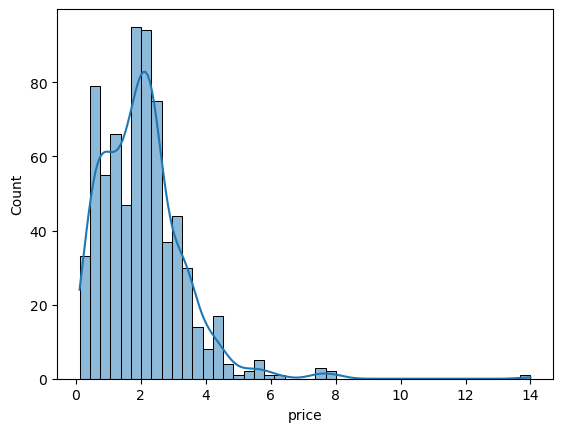

In [132]:
print(f"Skewness: { df['price'].skew() }")
sns.histplot(x = df['price'],kde=True)
plt.show()

In [133]:
sector_filt('Kishanpura')

,Society,Sector,City
221,NaN,Kishanpura,Panchkula
311,BCL Chinar homes,Kishanpura,Panchkula
313,NaN,Kishanpura,Panchkula
315,NaN,Kishanpura,Panchkula
701,BCL Chinar homes,Kishanpura,Panchkula


In [134]:
df.loc[sector_filt('Kishanpura').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
221,R75540107,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Kishanpura,Panchkula,"Shree Devaji Residency, Kishanpura, Panchkula,...","49 B And 49 C, Kishanpura, Panchkula, Haryana","28,000 per sq.yards",Built Up area: 125 (104.52 sq.m.)Carpet area: ...,sq.yards,3,3,2,NaN,North-East,2,3,Main Road,New,Marble,Yes,Semifurnished,1,1,60.0,"24*7 Water,Borewell/Tank",NaN,No,No,3 bhk flat for sale covering 112 sq yard of ar...,"['3 Fan', '11 Light', 'No AC', 'No Bed', 'No C...","['Water Storage', 'No open drainage around', '...",0.35
311,A76598377,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,BCL Chinar homes,Kishanpura,Panchkula,"BCL Chinar homes, Kishanpura, Panchkula, Haryana","Kishanpura, Panchkula, Haryana","3,513 per sq.ft.",Carpet area: 1850 (171.87 sq.m.) sq.ft.,sq.ft.,3,3,2,"Pooja Room,Others",North,8,12,"Main Road,Park/Garden",RelNew,Marble,Yes,Unfurnished,1,1,50.0,24*7 Water,Partial,Yes,Yes,Flat sale in chinar homes dhakoli in average p...,NaN,"['Power Back-up', 'Security / Fire Alarm', 'Li...",0.65
313,M76598187,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Kishanpura,Panchkula,"motia harmony greens, Kishanpura, Panchkula, H...","Kishanpura, Panchkula, Haryana","4,672 per sq.ft.",Carpet area: 1755 (163.04 sq.m.) sq.ft.,sq.ft.,3,3,2,"Pooja Room,Servant Room,Others",North,2,4,"Club,Main Road,Others,Park/Garden,Pool",New,Polished concrete,Yes,Unfurnished,1,1,100.0,"24*7 Water,Municipal corporation",Full,No,Yes,Flat sale in kishan pura dhakoli in best price...,NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",0.82
315,C76597499,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Kishanpura,Panchkula,"hi green, Kishanpura, Panchkula, Haryana","Kishanpura, Panchkula, Haryana","4,457 per sq.ft.",Carpet area: 1850 (171.87 sq.m.) sq.ft.,sq.ft.,3,3,2,"Pooja Room,Study Room,Servant Room,Others",North,2,11,"Club,Main Road,Park/Garden,Pool",RelNew,Marble,No,Unfurnished,1,1,50.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,No,No,Flat for sale in hi green in very good price,NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",0.80
701,U73063111,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,BCL Chinar homes,Kishanpura,Panchkula,"BCL Chinar homes, Kishanpura, Panchkula, Haryana","Kishanpura, Panchkula, Haryana","4,482 per sq.ft.",Carpet area: 1450 (134.71 sq.m.) sq.ft.,sq.ft.,3,3,2,"Pooja Room,Others",East,5,11,"Club,Others,Park/Garden,Pool",New,Vitrified,Yes,Unfurnished,1,1,NaN,"24*7 Water,Borewell/Tank",Full,Yes,Yes,Its a raw flat with only 2 flats on two floors...,NaN,"['Power Back-up', 'Lift(s)', 'Swimming Pool', ...",0.65


In [135]:
temp_rows = sector_filt('Kishanpura').index
for i in temp_rows:
    df['City'].loc[i] = 'Mohali'

In [136]:
df['Sector'].value_counts()

Sector
Sector 3 Panchkula                209
Sector 20 Panchkula               101
Peer Muchalla                      94
Mansa Devi Complex                 39
Sector 15 Panchkula                28
Sector 4 Panchkula                 19
Sector 21 Panchkula                19
Sector 17 Panchkula                19
Sector 11 Panchkula                18
Zirakpur                           18
Sector 2 Panchkula                 17
Sector 7 Panchkula                 15
Sector 8 panchkula                 12
Sector 10 Panchkula                 9
Sector 16 Panchkula                 9
Sector 12 Panchkula                 8
Sector 9 Panchkula                  8
Sector 12 A Panchkula               8
Sector 14 Panchkula                 7
Sector 24 Panchkula                 6
Kishanpura                          5
Sector 28 Panchkula                 5
Sector 27 Panchkula                 5
Sector 6 Panchkula                  4
Dhakoli                             3
Pink City                           3
Amrav

In [137]:
sector_filt('Pink City')

,Society,Sector,City
279,NaN,Pink City,Panchkula
288,NaN,Pink City,Panchkula
316,NaN,Pink City,Panchkula


In [138]:
df.loc[sector_filt('Pink City').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
279,A76413441,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Pink City,Panchkula,"Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","5,040 per sq.ft.",Carpet area: 990 (91.97 sq.m.) sq.ft.,sq.ft.,3,3,1,Others,East,1,3,NaN,New,Vitrified,Yes,Semifurnished,1,1,35.0,Municipal corporation,NaN,No,No,3 bhk brand new luxurious flat first floor wit...,"['3 Wardrobe', '12 Light', '1 Modular Kitchen'...","['Water Storage', 'Visitor Parking']",0.499
288,F75811231,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Pink City,Panchkula,"apartment, Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","5,333 per sq.ft.",Carpet area: 900 (83.61 sq.m.) sq.ft.,sq.ft.,3,3,3,NaN,East,1,3,NaN,RelNew,Others,Yes,Semifurnished,1,0,NaN,NaN,Partial,Yes,Yes,"This 3 bhk flat is located in apartment, which...","['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '13 L...","['Power Back-up', 'Feng Shui / Vaastu Complian...",0.480
316,L76394507,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Pink City,Panchkula,"Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","4,000 per sq.ft.",Carpet area: 1450 (134.71 sq.m.) sq.ft.,sq.ft.,3,3,2,NaN,North-East,2,3,"Club,Main Road,Others,Park/Garden",New,Others,Yes,Semifurnished,0,0,NaN,"24*7 Water,Borewell/Tank,Municipal corporation",Partial,Yes,Yes,Looking for magnificent 3 bhk builder floors i...,"['1 Water Purifier', '1 Fridge', '6 Fan', '1 E...","['Feng Shui / Vaastu Compliant', 'Water purifi...",0.580


In [139]:
temp_rows = sector_filt('Pink City').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Peer Muchalla'
    df['Society'].loc[i] = 'Pink City'

In [140]:
df.loc[[279,288,316]]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
279,A76413441,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,Pink City,Peer Muchalla,Panchkula,"Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","5,040 per sq.ft.",Carpet area: 990 (91.97 sq.m.) sq.ft.,sq.ft.,3,3,1,Others,East,1,3,NaN,New,Vitrified,Yes,Semifurnished,1,1,35.0,Municipal corporation,NaN,No,No,3 bhk brand new luxurious flat first floor wit...,"['3 Wardrobe', '12 Light', '1 Modular Kitchen'...","['Water Storage', 'Visitor Parking']",0.499
288,F75811231,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Pink City,Peer Muchalla,Panchkula,"apartment, Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","5,333 per sq.ft.",Carpet area: 900 (83.61 sq.m.) sq.ft.,sq.ft.,3,3,3,NaN,East,1,3,NaN,RelNew,Others,Yes,Semifurnished,1,0,NaN,NaN,Partial,Yes,Yes,"This 3 bhk flat is located in apartment, which...","['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '13 L...","['Power Back-up', 'Feng Shui / Vaastu Complian...",0.480
316,L76394507,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,Pink City,Peer Muchalla,Panchkula,"Pink City, Panchkula, Haryana","Pink City, Panchkula, Haryana","4,000 per sq.ft.",Carpet area: 1450 (134.71 sq.m.) sq.ft.,sq.ft.,3,3,2,NaN,North-East,2,3,"Club,Main Road,Others,Park/Garden",New,Others,Yes,Semifurnished,0,0,NaN,"24*7 Water,Borewell/Tank,Municipal corporation",Partial,Yes,Yes,Looking for magnificent 3 bhk builder floors i...,"['1 Water Purifier', '1 Fridge', '6 Fan', '1 E...","['Feng Shui / Vaastu Compliant', 'Water purifi...",0.580


In [141]:
df.loc[sector_filt('Maheshpur').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
228,C74890399,4BHK 4Baths,Builder Floor,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Maheshpur,Panchkula,"Maheshpur, Panchkula, Haryana","Maheshpur, Panchkula, Haryana","1,26,000 per sq.ft.",Carpet area: 500 (46.45 sq.m.) sq.ft.,sq.ft.,4,4,3,"Pooja Room,Study Room,Servant Room",North-East,1,4,"Club,Main Road,Others,Park/Garden,Sea facing",New,Marble,Yes,Semifurnished,2,2,NaN,"24*7 Water,Borewell/Tank,Municipal corporation",Full,No,No,Sometimes heart is available to sell,"['1 Fridge', '1 Geyser', '2 Light', '1 Modular...","['Water Storage', 'Park', 'Visitor Parking', '...",6.3
232,N74312911,4BHK 4Baths,Builder Floor,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Maheshpur,Panchkula,"Maheshpur, Panchkula, Haryana","Maheshpur, Panchkula, Haryana","1,20,000 per sq.ft.",Carpet area: 500 (46.45 sq.m.) sq.ft.,sq.ft.,4,4,3,"Pooja Room,Study Room,Servant Room,Others",North-East,2,4,"Club,Main Road,Park/Garden,Sea facing",New,Mosaic,Yes,Furnished,2,2,NaN,"24*7 Water,Borewell/Tank,Municipal corporation",Full,No,Yes,"This 4 bhk builder floor located in maheshpur,...","['1 Water Purifier', '1 Sofa', '1 Exhaust Fan'...","['Water purifier', 'Maintenance Staff', 'Water...",6.0


In [142]:
temp_rows = sector_filt('Maheshpur').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Sector 21 Panchkula'

In [143]:
df.loc[sector_filt('Baltana').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
195,T76682935,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Baltana,Panchkula,"Ravindra Apartment, Baltana, Panchkula, Haryana","Baltana, Panchkula, Haryana","2,800 per sq.ft.",Built Up area: 1250 (116.13 sq.m.)Carpet area:...,sq.ft.,2,2,3,Pooja Room,North-East,3,4,"Main Road,Park/Garden",ModOld,Marble,Yes,Semifurnished,1,0,30.0,Borewell/Tank,NaN,No,Yes,"All rooms are spacious and well ventilated, ga...","['1 Wardrobe', '1 Fan', '1 Stove', '1 Light', ...","['Security / Fire Alarm', 'Maintenance Staff',...",0.35
711,I62179308,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Baltana,Panchkula,"Sohi Tower, Baltana, Panchkula, Haryana","Govind Vihar, Baltana, Zirakpur, Punjab, Balta...","2,804 per sq.ft.",Super Built up area 1100(102.19 sq.m.) sq.ft.,sq.ft.,2,2,2,NaN,North,5,6,Park/Garden,Old,Vitrified,Yes,Furnished,1,0,NaN,"Borewell/Tank,Municipal corporation",Full,No,No,We are the proud owners of this 2 bhk apartmen...,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '4 Li...","['Private Garden / Terrace', 'Lift(s)', 'Maint...",0.35


In [144]:
temp_rows = sector_filt('Baltana').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Zirakpur'
    df['City'].loc[i] = 'Mohali'

In [145]:
df['Society'].loc[195] = 'Baltana'
df['Society'].loc[711] = 'Baltana'

In [146]:
df['Sector'].value_counts()

Sector
Sector 3 Panchkula                209
Sector 20 Panchkula               101
Peer Muchalla                      97
Mansa Devi Complex                 39
Sector 15 Panchkula                28
Sector 21 Panchkula                21
Zirakpur                           20
Sector 4 Panchkula                 19
Sector 17 Panchkula                19
Sector 11 Panchkula                18
Sector 2 Panchkula                 17
Sector 7 Panchkula                 15
Sector 8 panchkula                 12
Sector 10 Panchkula                 9
Sector 16 Panchkula                 9
Sector 12 Panchkula                 8
Sector 9 Panchkula                  8
Sector 12 A Panchkula               8
Sector 14 Panchkula                 7
Sector 24 Panchkula                 6
Kishanpura                          5
Sector 28 Panchkula                 5
Sector 27 Panchkula                 5
Sector 6 Panchkula                  4
Dhakoli                             3
Sector 23 Panchkula                 2
Secto

In [147]:
sector_filt('Sector 3 Panchkula')

,Society,Sector,City
0,DLF The Valley,Sector 3 Panchkula,Panchkula
2,DLF The Valley,Sector 3 Panchkula,Panchkula
3,DLF The Valley,Sector 3 Panchkula,Panchkula
4,DLF The Valley,Sector 3 Panchkula,Panchkula
13,DLF The Valley,Sector 3 Panchkula,Panchkula
14,DLF The Valley,Sector 3 Panchkula,Panchkula
15,DLF The Valley,Sector 3 Panchkula,Panchkula
16,DLF The Valley,Sector 3 Panchkula,Panchkula
18,DLF The Valley,Sector 3 Panchkula,Panchkula
19,DLF The Valley,Sector 3 Panchkula,Panchkula


In [148]:
sector_filt('Pinjore')

,Society,Sector,City
449,ANA Amravati Apartments,Pinjore,Panchkula
713,NaN,Pinjore,Panchkula


In [149]:
temp_rows = sector_filt('Sector 3 Panchkula').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Pinjore'

In [150]:
sector_filt('Amravati Enclave')

,Society,Sector,City
680,NaN,Amravati Enclave,Panchkula
684,NaN,Amravati Enclave,Panchkula


In [151]:
temp_rows = sector_filt('Amravati Enclave').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Pinjore'
    df['Society'].loc[i] = 'Amravati Enclave'

In [152]:
df.loc[sector_filt('Housing Board Colony').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
637,R76094223,2BHK 1Bath,Builder Floor,https://www.99acres.com/2-bhk-bedroom-independ...,NaN,Housing Board Colony,Panchkula,"Housing Board Colony, Panchkula, Haryana","Housing Board Colony, Panchkula, Haryana","29,411 per sq.yards",Carpet area: 170 (142.14 sq.m.) sq.yards,sq.yards,2,1,2,NaN,NaN,1,2,NaN,Old,NaN,No,Unfurnished,0,1,NaN,NaN,NaN,No,No,Property is @ house no 109 at hig colony.Housi...,NaN,NaN,0.5
678,G75248487,4BHK 3Baths,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,NaN,Housing Board Colony,Panchkula,"hig block, Housing Board Colony, Panchkula, Ha...","Housing Board Colony, Panchkula, Haryana","4,000 per sq.ft.",Carpet area: 2000 (185.81 sq.m.) sq.ft.,sq.ft.,4,3,3,NaN,North-East,1,2,"Main Road,Others,Park/Garden",Old,Marble,No,Unfurnished,0,2,30.0,NaN,NaN,No,No,Prime location property on kalka shimla highwa...,NaN,"['Water Storage', 'Park', 'Visitor Parking']",0.8


In [153]:
temp_rows = sector_filt('Housing Board Colony').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kalka'

In [154]:
df['Sector'].value_counts()

Sector
Pinjore                           213
Sector 20 Panchkula               101
Peer Muchalla                      97
Mansa Devi Complex                 39
Sector 15 Panchkula                28
Sector 21 Panchkula                21
Zirakpur                           20
Sector 17 Panchkula                19
Sector 4 Panchkula                 19
Sector 11 Panchkula                18
Sector 2 Panchkula                 17
Sector 7 Panchkula                 15
Sector 8 panchkula                 12
Sector 16 Panchkula                 9
Sector 10 Panchkula                 9
Sector 12 Panchkula                 8
Sector 9 Panchkula                  8
Sector 12 A Panchkula               8
Sector 14 Panchkula                 7
Sector 24 Panchkula                 6
Sector 27 Panchkula                 5
Sector 28 Panchkula                 5
Kishanpura                          5
Sector 6 Panchkula                  4
Kalka                               3
Dhakoli                             3
Secto

In [155]:
sector_filt('Part 2 Sector 20 Panchkula')

,Society,Sector,City
37,NaN,Part 2 Sector 20 Panchkula,Panchkula


In [156]:
df['link'].loc[37]

'https://www.99acres.com/4-bhk-bedroom-apartment-flat-for-sale-in-part-2-sector-20-panchkula-2260-sq-ft-spid-R75607923'

In [157]:
df['Society'].value_counts()

Society
DLF The Valley                 209
Suncity Parikrama               20
Trident Hills                   10
Parsvnath Royale                 5
Trishla Plus Homes               5
Exotic Magnifiq                  4
Pink City                        3
Hanumant Bollywood Heights       3
Idyllic Panchkula Eco City       2
BCL Chinar homes                 2
Baltana                          2
AP Platinum Towers               2
PGI Enclave                      2
Amravati Enclave                 2
The Manav Hut                    1
Imperial Tower                   1
ANA Amravati Apartments          1
Gen X Abode Royal Estates 2      1
Shree Vardhman Green Space       1
Name: count, dtype: int64

In [158]:
def society_filt(sector):
    return df[df['Society'] == sector][['Society','Sector','City']]

In [159]:
df.loc[society_filt('Hanumant Bollywood Heights').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
22,M71284356,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Hanumant Bollywood Heights,Sector 20 Panchkula,Panchkula,"Hanumant Bollywood Heights, Sector 20 Panchkul...","Sector 20 Panchkula, Panchkula, Haryana","4,342 per sq.ft.",Built Up area: 1727 (160.44 sq.m.) sq.ft.,sq.ft.,3,3,3,Store Room,NaN,5,6,"Club,Main Road,Park/Garden,Pool",ModOld,NaN,Yes,Semifurnished,0,0,NaN,"24*7 Water,Borewell/Tank",Full,No,No,Hanumant bollywood heights is one of the most ...,"['3 Wardrobe', '1 Modular Kitchen', 'No AC', '...","['Lift(s)', 'Maintenance Staff', 'Swimming Poo...",0.90
33,Q76309995,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Hanumant Bollywood Heights,Sector 20 Panchkula,Panchkula,"Hanumant Bollywood Heights, Sector 20 Panchkul...","Sector 20 Panchkula, Panchkula, Haryana","6,369 per sq.ft.",Super Built up area 1727(160.44 sq.m.)Carpet a...,sq.ft.,3,3,3,Others,NaN,4,6,"Club,Park/Garden,Pool",ModOld,Vitrified,Yes,Semifurnished,1,0,NaN,24*7 Water,Full,No,No,"Bollywood heights 1, peer muchalla 3bhk for re...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Ge...","['Power Back-up', 'Lift(s)', 'Swimming Pool', ...",1.10
429,P76495369,4BHK 4Baths,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,Hanumant Bollywood Heights,Sector 20 Panchkula,Panchkula,"Hanumant Bollywood Heights, Sector 20 Panchkul...","Sector 20 Panchkula, Panchkula, Haryana","6,739 per sq.ft.",Super Built up area 2300(213.68 sq.m.) sq.ft.,sq.ft.,4,4,4,NaN,NaN,1,6,"Club,Park/Garden",ModOld,NaN,Yes,Semifurnished,1,1,NaN,"24*7 Water,Borewell/Tank,Municipal corporation",Full,No,No,Hanumant bollywood heights is one of the most ...,"['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '15 L...","['Power Back-up', 'Lift(s)', 'Swimming Pool', ...",1.55


In [160]:
temp_rows = sector_filt('Part 2 Sector 20 Panchkula').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Sector 20 Panchkula'
    df['Society'].loc[i] = 'Hanumant Bollywood Heights'

In [161]:
df['Sector'].value_counts()

Sector
Pinjore                           213
Sector 20 Panchkula               102
Peer Muchalla                      97
Mansa Devi Complex                 39
Sector 15 Panchkula                28
Sector 21 Panchkula                21
Zirakpur                           20
Sector 4 Panchkula                 19
Sector 17 Panchkula                19
Sector 11 Panchkula                18
Sector 2 Panchkula                 17
Sector 7 Panchkula                 15
Sector 8 panchkula                 12
Sector 10 Panchkula                 9
Sector 16 Panchkula                 9
Sector 12 Panchkula                 8
Sector 12 A Panchkula               8
Sector 9 Panchkula                  8
Sector 14 Panchkula                 7
Sector 24 Panchkula                 6
Kishanpura                          5
Sector 28 Panchkula                 5
Sector 27 Panchkula                 5
Sector 6 Panchkula                  4
Kalka                               3
Dhakoli                             3
Secto

In [162]:
sector_filt('Sector 5 Panchkula')

,Society,Sector,City
690,NaN,Sector 5 Panchkula,Panchkula


In [163]:
df['link'].loc[690]

'https://www.99acres.com/3-bhk-bedroom-apartment-flat-for-sale-in-mansa-devi-complex-sector-5-panchkula-1680-sq-ft-spid-R74884803'

In [164]:
temp_rows = sector_filt('Sector 5 Panchkula').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Mansa Devi Complex'

In [165]:
df.loc[sector_filt('Sector 6 Panchkula').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
357,L76184767,1BHK 1Bath,Flat/Apartment,https://www.99acres.com/1-bhk-bedroom-apartmen...,NaN,Sector 6 Panchkula,Panchkula,"Hewo Apartments Owners Welfare Association, Se...","Sector 6 Panchkula, Panchkula, Haryana","10,820 per sq.ft.",Carpet area: 670 (62.25 sq.m.) sq.ft.,sq.ft.,1,1,2,NaN,East,5,8,"Main Road,Park/Garden",ModOld,Ceramic,Yes,Unfurnished,1,1,65.0,Municipal corporation,Full,Yes,Yes,One bhk independent flat available for sale in...,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",0.725
358,M75607793,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Sector 6 Panchkula,Panchkula,"yuva , Sector 6 Panchkula, Panchkula, Haryana","Sector 6 Panchkula, Panchkula, Haryana","12,202 per sq.ft.",Carpet area: 1680 (156.08 sq.m.) sq.ft.,sq.ft.,3,3,3,NaN,North-East,1,8,"Main Road,Park/Garden",Old,Vitrified,Yes,Furnished,1,1,80.0,Municipal corporation,Full,Yes,Yes,Three bhk independent flat available for sale ...,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 E...","['Feng Shui / Vaastu Compliant', 'Security / F...",2.050
415,X76537529,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Sector 6 Panchkula,Panchkula,"Manav Hut, Sector 6 Panchkula, Panchkula, Haryana","Manav Hut Society, Sector 6 Panchkula, Panchku...","13,095 per sq.ft.",Carpet area: 840 (78.04 sq.m.) sq.ft.,sq.ft.,2,2,4,NaN,NaN,3,8,NaN,ModOld,NaN,Yes,Semifurnished,1,1,NaN,"24*7 Water,Borewell/Tank,Municipal corporation",NaN,No,No,A 2bhk flat on sale in good location in manav ...,"['2 Wardrobe', '2 Fan', 'No AC', 'No Bed', 'No...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...",1.100
617,E76444025,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Sector 6 Panchkula,Panchkula,"Manav Hut, Sector 6 Panchkula, Panchkula, Haryana","Sector 6 Panchkula, Panchkula, Haryana","10,800 per sq.ft.",Carpet area: 1000 (92.9 sq.m.) sq.ft.,sq.ft.,2,2,4,NaN,East,4,8,"Main Road,Park/Garden",Old,Vitrified,Yes,Unfurnished,1,1,70.0,Municipal corporation,Partial,Yes,Yes,2 bhk independent flat available for sale in m...,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",1.080


In [166]:
df['link'].loc[358]

'https://www.99acres.com/3-bhk-bedroom-apartment-flat-for-sale-in-sector-6-panchkula-1680-sq-ft-spid-M75607793'

In [167]:
temp_rows = sector_filt('Sector 6 Panchkula').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Mansa Devi Complex'

In [168]:
sect_remove = df['Sector'].value_counts().tail(7).index

In [169]:
row_drop = []
for i in sect_remove:
    row_drop += list(sector_filt(i).index)

In [170]:
df.drop(row_drop,inplace = True)

In [171]:
df['Sector'].value_counts()

Sector
Pinjore                  213
Sector 20 Panchkula      102
Peer Muchalla             97
Mansa Devi Complex        44
Sector 15 Panchkula       28
Sector 21 Panchkula       21
Zirakpur                  20
Sector 17 Panchkula       19
Sector 4 Panchkula        19
Sector 11 Panchkula       18
Sector 2 Panchkula        17
Sector 7 Panchkula        15
Sector 8 panchkula        12
Sector 10 Panchkula        9
Sector 16 Panchkula        9
Sector 12 Panchkula        8
Sector 12 A Panchkula      8
Sector 9 Panchkula         8
Sector 14 Panchkula        7
Sector 24 Panchkula        6
Kishanpura                 5
Sector 28 Panchkula        5
Sector 27 Panchkula        5
Dhakoli                    3
Kalka                      3
Sector 19 Panchkula        2
Sector 31 Panchkula        2
Sector 23 Panchkula        2
Name: count, dtype: int64

In [172]:
df.to_csv('data/clean/v2/pkl/flats-pkl-with-extra-address.csv',index = False)

In [173]:
df.drop(columns = ['address1','address2'],inplace = True)

In [174]:
df.to_csv('data/clean/v2/pkl/flats-pkl-clean-v2.csv',index = False)